In [1]:
#-------------------------- Standard Imports --------------------------#
%reload_ext autoreload
%autoreload 2
import pandas as pd
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns
import acr
import warnings
import pingouin as pg
from scipy.stats import shapiro, normaltest
import os
from pathlib import Path

import pingouin as pg

warnings.filterwarnings('ignore')
probe_ord = ['NNXr', 'NNXo']
#hue_ord = [NNXR_GRAY, MAIN_COLOR]
from kdephys.utils.main import td

#--------------------------------- Import Publication Functions ---------------------------------#
pub_utils = acr.utils.import_publication_functions('/Users/driessen2@ad.wisc.edu/kdriessen/gh_master/PUBLICATION__ACR/pub_utils.py', 'pub_utils')
from pub_utils import *
data_agg = acr.utils.import_publication_functions('/Users/driessen2@ad.wisc.edu/kdriessen/gh_master/PUBLICATION__ACR/data_agg.py', 'data_agg')
from data_agg import *

#--------------------------------- Plotting Setup ---------------------------------#
import pubplots as pp
style_path = '/Users/driessen2@ad.wisc.edu/kdriessen/acr_dev/acr/src/acr/plot_styles/acrvec_labels.mplstyle'
plt.rcdefaults()
plt.style.use(style_path)

In [2]:
nbroot = os.path.join(PAPER_FIGURE_ROOT, 'response_to_review', 'fr_comps')
Path(nbroot).mkdir(parents=True, exist_ok=True)

# Get Data

# Basic FR During Stimulation

In [3]:
COMP_ANALYSIS = 'fr_stim'
results = {}

In [4]:
src_dats = []

In [5]:
SUBJECT_TYPE = 'som'
MAIN_EXP = 'swi'
cons = []
ops = []
subjects, exps = get_subject_list(type=SUBJECT_TYPE, exp=MAIN_EXP)
src = pd.read_csv(rev_dat_path(COMP_ANALYSIS, SUBJECT_TYPE))
src['subject'] = subjects
locations = [acr.utils.sub_probe_locations[sub] for sub in subjects]
src['location'] = locations
src['sub_type'] = SUBJECT_TYPE
scon = src['contra_control'].values
cons.append(scon)
sop = src['off_induction'].values
ops.append(sop)
results[SUBJECT_TYPE] = sop / scon
src_dats.append(src)

In [6]:
SUBJECT_TYPE = 'acr'
MAIN_EXP = 'swi'
subjects, exps = get_subject_list(type=SUBJECT_TYPE, exp=MAIN_EXP)
subjects, exps = remove_subject('ACR_16', subjects, exps)
src = pd.read_csv(rev_dat_path(COMP_ANALYSIS, SUBJECT_TYPE))
src['subject'] = subjects
locations = [acr.utils.sub_probe_locations[sub] for sub in subjects]
src['location'] = locations
src['sub_type'] = SUBJECT_TYPE
scon = src['contra_control'].values
cons.append(scon)
sop = src['off_induction'].values
ops.append(sop)
results[SUBJECT_TYPE] = sop / scon
src_dats.append(src)

In [7]:
SUBJECT_TYPE = 'halo'
MAIN_EXP = 'swisin'
subjects, exps = get_subject_list(type=SUBJECT_TYPE, exp=MAIN_EXP)
src = pd.read_csv(rev_dat_path(COMP_ANALYSIS, SUBJECT_TYPE))
src['subject'] = subjects
locations = [acr.utils.sub_probe_locations[sub] for sub in subjects]
src['location'] = locations
src['sub_type'] = SUBJECT_TYPE
scon = src['contra_control'].values
cons.append(scon)
sop = src['off_induction'].values
ops.append(sop)
results[SUBJECT_TYPE] = sop / scon
src_dats.append(src)

In [8]:
src = pd.concat(src_dats)

In [9]:
cons = np.concatenate(cons)
ops = np.concatenate(ops)
df = pd.DataFrame({
    'swa_ratio': np.concatenate([results[v] for v in results.keys()]),
    'group': ['som']*len(results['som']) + ['acr']*len(results['acr']) + ['halo']*len(results['halo'])
})

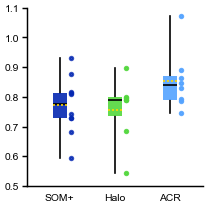

In [10]:
figname = 'ANOVA_fr_during_stim_all_groups'
figpath = os.path.join(nbroot, f'{figname}.svg')

with pp.destination("figma", style="/Users/driessen2@ad.wisc.edu/kdriessen/acr_dev/acr/src/acr/plot_styles/acrvec_labels.mplstyle"):
    f, ax = plt.subplots(1, 1, figsize=pp.scale(1.5, 1.5))
    # Boxplots for all three conditions

    ax, box = acr.plots.add_boxplot(ax, results['som'], positions=[0.45], widths=0.0125, color=SOM_BLUE, means=True, mean_color='gold', mean_linewidth=2.5, mean_linestyle='--', mean_dashes=(1.2, 1.2), alpha=0.9, whisker_linewidth=2.5, median_linewidth=2.5)
    ax = acr.plots.add_data_points(ax, results['som'], x_pos=0.46, color=SOM_BLUE, alpha=0.8, s=25, zorder=202)

    ax, box2 = acr.plots.add_boxplot(ax, results['halo'], positions=[0.5], widths=0.0125, color=HALO_GREEN, means=True, mean_color='gold', mean_linewidth=2.5, mean_linestyle='--', mean_dashes=(1.2, 1.2), alpha=0.9, whisker_linewidth=2.5, median_linewidth=2.5)
    ax = acr.plots.add_data_points(ax, results['halo'], x_pos=0.51, color=HALO_GREEN, alpha=0.9, s=25, zorder=203)

    ax, box3 = acr.plots.add_boxplot(ax, results['acr'], positions=[0.55], widths=0.0125, color=ACR_BLUE, means=True, mean_color='gold', mean_linewidth=2.5, mean_linestyle='--', mean_dashes=(1.2, 1.2), alpha=0.9, whisker_linewidth=2.5, median_linewidth=2.5)
    ax = acr.plots.add_data_points(ax, results['acr'], x_pos=0.56, color=ACR_BLUE, alpha=0.9, s=25, zorder=204)

    ax.set_xlim(0.42, 0.58)
    #ax.set_ylim(0.3, 0.8)
    ax.set_yticks([0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1])
    ax.set_xticklabels(['SOM+', 'Halo', 'ACR'])


    #ax.axhline(0.5, color='red', linestyle='--')

    plt.tight_layout()
    plt.show()
    f.savefig(figpath, dpi=600, bbox_inches='tight')

In [11]:
# Normality Checks
from scipy.stats import shapiro
_, p = shapiro(results['som'])
print(f'p-value for som: {p}')

_, p = shapiro(results['acr'])
print(f'p-value for acr: {p}')

_, p = shapiro(results['halo'])
print(f'p-value for halo: {p}')

p-value for som: 0.9419390972865931
p-value for acr: 0.10389458646168132
p-value for halo: 0.17069673184967787


In [12]:
homo = pg.homoscedasticity(dv='swa_ratio', group='group', data=df)
homo

,W,pval,equal_var
levene,0.070088,0.932519,True


In [16]:
anov = pg.anova(dv='swa_ratio', between='group', data=df)
anov

,Source,ddof1,ddof2,F,p-unc,np2
0,group,2,22,2.032435,0.154895,0.155952


In [17]:
acr.stats.write_stats_result(
    figname, 
    'ANOVA',
    test_statistic=anov['F'][0],
    p_value=anov['p-unc'][0],
    effect_size_method='np2',
    effect_size=anov['np2'][0],
    review=True,
)

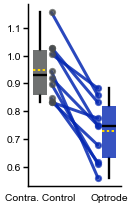

In [45]:
figname = 'fr_during_stim_SOM'
figpath = os.path.join(nbroot, f'{figname}.svg')
nnxr = src.query('sub_type == "som"')['contra_control']
nnxo = src.query('sub_type == "som"')['off_induction']
with pp.destination('figma', style=style_path):
    f, ax = acr.plots.gen_paired_boxplot(nnxr, nnxo, colors=[NNXR_GRAY, SOM_BLUE], fsize=pp.scale(0.95, 1.5), mean_linewidth=3, dot_size=60, median_linewidth=3.5, whisker_linewidth=3.5)
    ax.set_xticklabels(['Contra. Control', 'Optrode'])
    plt.show()
    f.savefig(figpath, dpi=600, bbox_inches='tight', transparent=True)

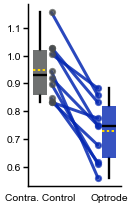

shapiro_p-value: 0.9866001914629111
d,agostino_p-value: 0.9926947762631357
hedges g: 1.9347048592571998


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,7.167479,9,two-sided,0.000053,"[0.15, 0.29]",2.020059,494.21,0.999872


In [19]:
figname = 'fr_during_stim_SOM'
figpath = os.path.join(nbroot, f'{figname}.svg')
nnxr = src.query('sub_type == "som"')['contra_control']
nnxo = src.query('sub_type == "som"')['off_induction']
with pp.destination('figma', style=style_path):
    f, ax = acr.plots.gen_paired_boxplot(nnxr, nnxo, colors=[NNXR_GRAY, SOM_BLUE], fsize=pp.scale(0.95, 1.5), mean_linewidth=3, dot_size=60, median_linewidth=3.5, whisker_linewidth=3.5)
    ax.set_xticklabels(['Contra. Control', 'Optrode'])
    plt.show()
    f.savefig(figpath, dpi=600, bbox_inches='tight', transparent=True)
diffs = nnxr - nnxo
shap_stat, shap_p = shapiro(diffs) # test the paired differences for normality
agostino_stat, agostino_p = normaltest(diffs) # test the paired differences for normality
print(f'shapiro_p-value: {shap_p}')
print(f'd,agostino_p-value: {agostino_p}')

stats = pg.ttest(nnxr, nnxo, paired=True)
# stats = pg.wilcoxon(nnxr, nnxo)
hg = pg.compute_effsize(nnxr, nnxo, paired=True, eftype='hedges')
print(f'hedges g: {hg}')

#r = acr.stats.calculate_wilx_r(stats['W-val'][0], len(nnxr))
# ==== Write Stats Results ====
acr.stats.write_stats_result(
    figname, 
    'paired_ttest',
    test_statistic=stats['T'][0],
    p_value=stats['p-val'][0],
    effect_size_method='g',
    effect_size=hg,
    review=True,
)

## ===== Write Source Data =====
#source_data = pd.DataFrame({'contra_control': nnxr, 'off_induction': nnxo, 'subject': np.arange(len(nnxr))})
#pu.write_source_data(source_data, stats_name)
stats

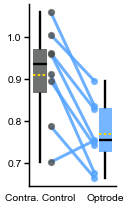

shapiro_p-value: 0.14073999907500906
d,agostino_p-value: 0.050956922727805505
               T  dof alternative     p-val         CI95%   cohen-d    BF10  \
T-test  4.378394    7   two-sided  0.003241  [0.06, 0.22]  1.411685  15.961   

           power  
T-test  0.925963  
hedges g: 1.334683676269804


In [20]:
nnxr = src.query('sub_type == "acr"')['contra_control']
nnxo = src.query('sub_type == "acr"')['off_induction']
colors = [NNXR_GRAY, ACR_BLUE]
figname = 'fr_during_stim_ACR'
figpath = os.path.join(nbroot, f'{figname}.svg')

with pp.destination('figma', style=style_path):
    f, ax = acr.plots.gen_paired_boxplot(nnxr, nnxo, colors=colors, fsize=pp.scale(0.95, 1.5), mean_linewidth=3, dot_size=60, median_linewidth=3.5, whisker_linewidth=3.5)
    ax.set_xticklabels(['Contra. Control', 'Optrode'])
    plt.show()
    f.savefig(figpath, dpi=600, bbox_inches='tight', transparent=True)
diffs = nnxr - nnxo
shap_stat, shap_p = shapiro(diffs) # test the paired differences for normality
agostino_stat, agostino_p = normaltest(diffs) # test the paired differences for normality
print(f'shapiro_p-value: {shap_p}')
print(f'd,agostino_p-value: {agostino_p}')

stats = pg.ttest(nnxr, nnxo, paired=True)
# stats = pg.wilcoxon(nnxr, nnxo)

print(stats)

hg = pg.compute_effsize(nnxr, nnxo, paired=True, eftype='hedges')
print(f'hedges g: {hg}')

#r = acr.stats.calculate_wilx_r(stats['W-val'][0], len(nnxr))
# ==== Write Stats Results ====
acr.stats.write_stats_result(
    figname, 
    'paired_ttest',
    test_statistic=stats['T'][0],
    p_value=stats['p-val'][0],
    effect_size_method='g',
    effect_size=hg,
    review=True,
)

## ===== Write Source Data =====
#source_data = pd.DataFrame({'contra_control': nnxr, 'off_induction': nnxo, 'subject': np.arange(len(nnxr))})
#pu.write_source_data(source_data, stats_name)


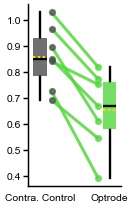

shapiro_p-value: 0.9077080615401767
d,agostino_p-value: nan
               T  dof alternative     p-val         CI95%   cohen-d    BF10  \
T-test  6.587206    6   two-sided  0.000588  [0.13, 0.28]  1.509968  62.621   

           power  
T-test  0.911115  
hedges g: 1.4135874613478596


In [21]:
nnxr = src.query('sub_type == "halo"')['contra_control']
nnxo = src.query('sub_type == "halo"')['off_induction']
colors = [NNXR_GRAY, HALO_GREEN]
figname = 'fr_during_stim_HALO'
figpath = os.path.join(nbroot, f'{figname}.svg')

with pp.destination('figma', style=style_path):
    f, ax = acr.plots.gen_paired_boxplot(nnxr, nnxo, colors=colors, fsize=pp.scale(0.95, 1.5), mean_linewidth=3, dot_size=60, median_linewidth=3.5, whisker_linewidth=3.5)
    ax.set_xticklabels(['Contra. Control', 'Optrode'])
    plt.show()
    f.savefig(figpath, dpi=600, bbox_inches='tight', transparent=True)
diffs = nnxr - nnxo
shap_stat, shap_p = shapiro(diffs) # test the paired differences for normality
agostino_stat, agostino_p = normaltest(diffs) # test the paired differences for normality
print(f'shapiro_p-value: {shap_p}')
print(f'd,agostino_p-value: {agostino_p}')

stats = pg.ttest(nnxr, nnxo, paired=True)
# stats = pg.wilcoxon(nnxr, nnxo)

print(stats)

hg = pg.compute_effsize(nnxr, nnxo, paired=True, eftype='hedges')
print(f'hedges g: {hg}')

#r = acr.stats.calculate_wilx_r(stats['W-val'][0], len(nnxr))
# ==== Write Stats Results ====
acr.stats.write_stats_result(
    figname, 
    'paired_ttest',
    test_statistic=stats['T'][0],
    p_value=stats['p-val'][0],
    effect_size_method='g',
    effect_size=hg,
    review=True,
)

## ===== Write Source Data =====
#source_data = pd.DataFrame({'contra_control': nnxr, 'off_induction': nnxo, 'subject': np.arange(len(nnxr))})
#pu.write_source_data(source_data, stats_name)


# OFF induction Frequency during Wake

In [22]:
COMP_ANALYSIS = 'off_freq_stim'
results = {}

In [23]:
src_dats = []

In [24]:
SUBJECT_TYPE = 'som'
MAIN_EXP = 'swi'
cons = []
ops = []
subjects, exps = get_subject_list(type=SUBJECT_TYPE, exp=MAIN_EXP)
src = pd.read_csv(rev_dat_path(COMP_ANALYSIS, SUBJECT_TYPE))
src['subject'] = subjects
locations = [acr.utils.sub_probe_locations[sub] for sub in subjects]
src['location'] = locations
src['sub_type'] = SUBJECT_TYPE
scon = src['contra_control'].values
cons.append(scon)
sop = src['off_induction'].values
ops.append(sop)
results[SUBJECT_TYPE] = sop / scon
src_dats.append(src)

In [25]:
SUBJECT_TYPE = 'acr'
MAIN_EXP = 'swi'
subjects, exps = get_subject_list(type=SUBJECT_TYPE, exp=MAIN_EXP)
subjects, exps = remove_subject('ACR_16', subjects, exps)
src = pd.read_csv(rev_dat_path(COMP_ANALYSIS, SUBJECT_TYPE))
src['subject'] = subjects
locations = [acr.utils.sub_probe_locations[sub] for sub in subjects]
src['location'] = locations
src['sub_type'] = SUBJECT_TYPE
scon = src['contra_control'].values
cons.append(scon)
sop = src['off_induction'].values
ops.append(sop)
results[SUBJECT_TYPE] = sop / scon
src_dats.append(src)

In [26]:
SUBJECT_TYPE = 'halo'
MAIN_EXP = 'swisin'
subjects, exps = get_subject_list(type=SUBJECT_TYPE, exp=MAIN_EXP)
src = pd.read_csv(rev_dat_path(COMP_ANALYSIS, SUBJECT_TYPE))
src['subject'] = subjects
locations = [acr.utils.sub_probe_locations[sub] for sub in subjects]
src['location'] = locations
src['sub_type'] = SUBJECT_TYPE
scon = src['contra_control'].values
cons.append(scon)
sop = src['off_induction'].values
ops.append(sop)
results[SUBJECT_TYPE] = sop / scon
src_dats.append(src)

In [27]:
src = pd.concat(src_dats)

In [28]:
cons_cat = np.concatenate(cons)
ops_cat = np.concatenate(ops)
df = pd.DataFrame({
    'swa_ratio': np.concatenate([results[v] for v in results.keys()]),
    'group': ['som']*len(results['som']) + ['acr']*len(results['acr']) + ['halo']*len(results['halo'])
})

# stats relative to CC

In [29]:
results_new = []
for i in range(len(ops)):
    results_new.append(ops[i] - cons[i])

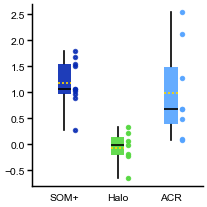

In [30]:
figname = 'ANOVA_OFF-freq_during_stim_all_groups'
figpath = os.path.join(nbroot, f'{figname}.svg')

with pp.destination("figma", style="/Users/driessen2@ad.wisc.edu/kdriessen/acr_dev/acr/src/acr/plot_styles/acrvec_labels.mplstyle"):
    f, ax = plt.subplots(1, 1, figsize=pp.scale(1.5, 1.5))
    # Boxplots for all three conditions

    ax, box = acr.plots.add_boxplot(ax, results_new[0], positions=[0.45], widths=0.0125, color=SOM_BLUE, means=True, mean_color='gold', mean_linewidth=2.5, mean_linestyle='--', mean_dashes=(1.2, 1.2), alpha=0.9, whisker_linewidth=2.5, median_linewidth=2.5)
    ax = acr.plots.add_data_points(ax, results_new[0], x_pos=0.46, color=SOM_BLUE, alpha=0.8, s=25, zorder=202)

    ax, box2 = acr.plots.add_boxplot(ax, results_new[2], positions=[0.5], widths=0.0125, color=HALO_GREEN, means=True, mean_color='gold', mean_linewidth=2.5, mean_linestyle='--', mean_dashes=(1.2, 1.2), alpha=0.9, whisker_linewidth=2.5, median_linewidth=2.5)
    ax = acr.plots.add_data_points(ax, results_new[2], x_pos=0.51, color=HALO_GREEN, alpha=0.9, s=25, zorder=203)

    ax, box3 = acr.plots.add_boxplot(ax, results_new[1], positions=[0.55], widths=0.0125, color=ACR_BLUE, means=True, mean_color='gold', mean_linewidth=2.5, mean_linestyle='--', mean_dashes=(1.2, 1.2), alpha=0.9, whisker_linewidth=2.5, median_linewidth=2.5)
    ax = acr.plots.add_data_points(ax, results_new[1], x_pos=0.56, color=ACR_BLUE, alpha=0.9, s=25, zorder=204)

    ax.set_xlim(0.42, 0.58)
    #ax.set_ylim(0.3, 0.8)
    #ax.set_yticks([0.6, 0.8, 1, 1.2])
    ax.set_xticklabels(['SOM+', 'Halo', 'ACR'])


    #ax.axhline(0.5, color='red', linestyle='--')

    plt.tight_layout()
    plt.show()
    f.savefig(figpath, dpi=600, bbox_inches='tight')

In [31]:
dfstat = df = pd.DataFrame({
    'off_freq': np.concatenate([results_new[v] for v in [0, 1, 2]]),
    'group': ['som']*len(results_new[0]) + ['acr']*len(results_new[1]) + ['halo']*len(results_new[2])
})

In [32]:
# Normality Checks
from scipy.stats import shapiro
_, p = shapiro(results_new[0])
print(f'p-value for som: {p}')

_, p = shapiro(results_new[1])
print(f'p-value for acr: {p}')

_, p = shapiro(results_new[2])
print(f'p-value for halo: {p}')

p-value for som: 0.3902201192401482
p-value for acr: 0.18544879492416244
p-value for halo: 0.8024306957255076


In [33]:
homo = pg.homoscedasticity(dv='off_freq', group='group', data=dfstat)
homo

,W,pval,equal_var
levene,1.906765,0.172317,True


In [34]:
anov = pg.anova(dv='off_freq', between='group', data=dfstat)
anov

,Source,ddof1,ddof2,F,p-unc,np2
0,group,2,22,9.271846,0.001201,0.457376


In [35]:
acr.stats.write_stats_result(
    figname, 
    'ANOVA',
    test_statistic=anov['F'][0],
    p_value=anov['p-unc'][0],
    effect_size_method='np2',
    effect_size=anov['np2'][0],
    review=True,
)

In [36]:
pwt = pg.pairwise_tukey(dv='off_freq', between='group', data=dfstat)
pwt

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,acr,halo,0.996607,-0.063194,1.059802,0.317329,3.339754,0.008016,1.420121
1,acr,som,0.996607,1.182485,-0.185878,0.290837,-0.639112,0.800338,-0.256108
2,halo,som,-0.063194,1.182485,-1.245679,0.302158,-4.122610,0.001250,-2.905751


In [37]:
conds = ['ACR-v-HALO__off-freq-in-stim', 'ACR-v-SOM__off-freq-in-stim', 'HALO-v-SOM__off-freq-in-stim']
for i, stat_name in enumerate(conds):
    acr.stats.write_stats_result(stat_name, 'pairwise_tukey', pwt['T'][i], pwt['p-tukey'][i], 'g', pwt['hedges'][i], review=True)